In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

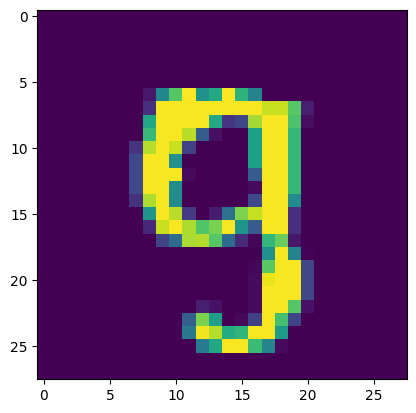

In [5]:

plt.imshow((df.iloc[1501,1:]).values.reshape(28,28))

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X.shape, y.shape

((42000, 784), (42000,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [8]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

10.404181241989136


In [10]:
accuracy_score(y_test, y_pred)

0.9680952380952381

# Using PCA to Reduce Dimensions

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=28)

X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((33600, 28), (8400, 28))

In [13]:
knn = KNeighborsClassifier()

knn.fit(X_train_transformed,y_train)
y_pred = knn.predict(X_test_transformed)

accuracy_score(y_test, y_pred)

0.9709523809523809